In [1]:
from plot_service import *
from numpy import *

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
train_file = 'datasets/train.csv'

X = loadtxt(train_file, usecols=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), unpack=True, delimiter=',').T
Y = loadtxt(train_file, unpack=True, usecols=(11), delimiter=',')

X_train, X_test, y_train, y_test = train_test_split(X, Y)

print('Data loaded!')

Data loaded!


In [3]:
def create_baseline_model():
    model = Sequential()
    model.add(Dense(100, input_dim=10, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])

    return model

In [4]:
model = create_baseline_model()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)
preds = model.predict(X_test)

Train on 327206 samples, validate on 109069 samples
Epoch 1/10
327206/327206 [==============================] - 13s 41us/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 2/10
327206/327206 [==============================] - 13s 41us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 3/10
327206/327206 [==============================] - 13s 40us/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 4/10
327206/327206 [==============================] - 13s 41us/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 5/10
327206/327206 [==============================] - 14s 41us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 6/10
327206/327206 [==============================] - 14s 42us/step - loss: 0.0017 - mean_sq

In [5]:
pred = preds.reshape(len(preds))
real = y_test

plot_table(real, pred)

|     Real |   Predict |
|----------+-----------|
| 0.085937 | 0.107116  |
| 0.152233 | 0.163714  |
| 0.031847 | 0.0949797 |
| 0.128993 | 0.145395  |
| 0.182944 | 0.0523599 |
| 0.117338 | 0.126055  |
| 0.075009 | 0.102084  |
| 0.380296 | 0.341069  |
| 0.18466  | 0.190072  |
| 0.63662  | 0.58239   |
| 0.134939 | 0.125034  |
| 0.066634 | 0.0822697 |
| 0.13974  | 0.122499  |
| 0.123332 | 0.0982449 |
| 0.10114  | 0.0900903 |
| 0.822839 | 0.561884  |
| 0.108779 | 0.107613  |
| 0.143329 | 0.179429  |
| 0.213998 | 0.190821  |
| 0.122412 | 0.103374  |
| 0.198824 | 0.14582   |
| 0.070853 | 0.083019  |
| 0.150846 | 0.139592  |
| 0.020992 | 0.0531615 |
| 0.152705 | 0.189538  |
| 0.443    | 0.528461  |
| 0.087636 | 0.0691269 |
| 0.237341 | 0.197002  |
| 0.154125 | 0.146716  |
| 0.133747 | 0.155031  |
| 0.463165 | 0.43011   |
| 0.184236 | 0.170568  |
| 0.207557 | 0.211131  |
| 0.046174 | 0.0478138 |
| 0.059037 | 0.12674   |
| 0.14487  | 0.118041  |
| 0.048142 | 0.104191  |
| 0.475978 | 0.438355  |


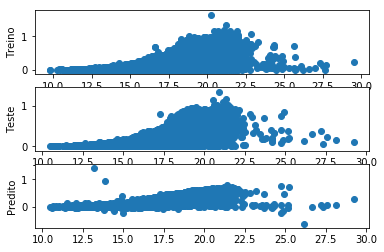

In [6]:
plot_scatter(X_train, y_train, X_test, y_test, preds)

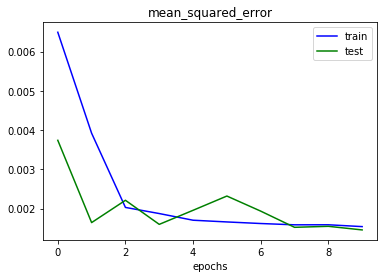

In [7]:
plot(hist.history, 'mean_squared_error')

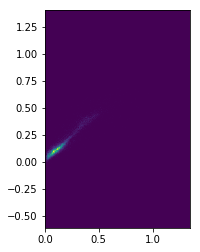

In [8]:
plot_hm(real, preds.T[0])